# 데이터 분석 실무
## 파이썬 라이브러리를 활용해서 통계 기법을 적용한 데이터 분석을 배우는 과정입니다.

#### 이번 시간은 공공자전거 수요 데이터를 활용해서 분석을 해보는 시간입니다.
* 먼저, 데이터를 불러오고 살펴보겠습니다.(서울특별시 공공자전거 대여이력 정보_2209.csv, encoding 'cp949')
* 서울시 공공자전거 대여이력 정보
* https://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do#

In [1]:
# 필요 라이브러리 import
import pandas as pd

In [2]:
# 데이터 불러오기
df_bike = pd.read_csv('서울특별시 공공자전거 대여이력 정보_2209.csv', encoding='cp949')
df_bike

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-54802,2022-09-01 00:00:42,794,양천문화회관,0,2022-09-01 00:01:10,00794,양천문화회관,0,0,0.0,2006,M,내국인,ST-2395,ST-2395
1,SPB-52640,2022-09-01 00:01:45,4472,송파파크데일 1단지 115동 건너편,0,2022-09-01 00:01:48,04472,송파파크데일 1단지 115동 건너편,0,0,0.0,1957,\N,내국인,ST-2585,ST-2585
2,SPB-45219,2022-09-01 00:01:23,2219,"고속터미널역 8-1번, 8-2번 출구 사이",0,2022-09-01 00:01:52,02219,"고속터미널역 8-1번, 8-2번 출구 사이",0,0,0.0,2004,M,내국인,ST-750,ST-750
3,SPB-44050,2022-09-01 00:01:50,568,청계8가사거리 부근,0,2022-09-01 00:02:00,00568,청계8가사거리 부근,0,0,0.0,\N,F,내국인,ST-369,ST-369
4,SPB-51340,2022-09-01 00:00:08,3120,DMC엘가아파트 앞,0,2022-09-01 00:02:17,00170,DMC파크뷰자이아파트 302동 앞,0,2,0.0,1993,F,내국인,ST-2205,ST-227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934836,SPB-30832,2022-09-30 16:54:39,5072,김포공항입구 교통섬,0,2022-10-02 13:03:18,\N,\N,\N,810,0.0,1999,\N,내국인,ST-2947,\N
4934837,SPB-45771,2022-09-30 17:42:39,1827,독산보도육교 앞 자전거 보관소,0,2022-10-02 13:03:47,\N,\N,\N,810,0.0,1998,F,내국인,ST-660,\N
4934838,SPB-38503,2022-09-30 18:14:56,574,아차산역4번출구,0,2022-10-02 13:04:15,\N,\N,\N,870,0.0,2007,M,내국인,ST-385,\N
4934839,SPB-37589,2022-09-30 23:04:00,281,신동아아파트 앞,0,2022-10-02 13:04:53,\N,\N,\N,810,0.0,\N,\N,비회원,ST-1540,\N


In [23]:
# 데이터 전처리

## 결측치 제거
df_bike = df_bike.dropna()

## 성별 변환
df_bike['성별'] = df_bike['성별'].replace({'m': 'M', 'f': 'F'})

## \N 제거
df_bike = df_bike[df_bike['성별'] != "\\N"]

## 이용거리 0 제거
df_bike = df_bike[df_bike['이용거리(M)'] != 0.00]

## 생년 \N 제거
df_bike = df_bike[df_bike['생년'] != "\\N"]

## 생년 2022년 초과 제거
df_bike['생년'] = df_bike['생년'].astype('int')
df_bike = df_bike[df_bike['생년'] <= 2022]

## 생년 0 제거
df_bike = df_bike[df_bike['생년'] != 0]

df_bike

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
8,SPB-57948,2022-09-01 00:00:00,354,포르투갈 대사관 앞,0,2022-09-01 00:03:33,03413,종로플레이스,0,3,1200.00,1997,M,내국인,ST-170,ST-1810
10,SPB-58852,2022-09-01 00:00:00,2164,관악우체국,0,2022-09-01 00:03:51,02190,도원맨션,0,3,560.00,1998,F,내국인,ST-1259,ST-2374
17,SPB-58698,2022-09-01 00:01:24,996,응암역2번출구 국민은행 앞,0,2022-09-01 00:04:13,00931,역촌파출소,0,2,500.00,1995,M,내국인,ST-2264,ST-479
19,SPB-30931,2022-09-01 00:00:23,1231,잠실역 6번출구,0,2022-09-01 00:04:27,04897,잠실주공5단지1,0,4,584.41,1988,F,내국인,ST-840,ST-2991
24,SPB-49229,2022-09-01 00:00:43,3586,군자역 비채온 오피스텔,0,2022-09-01 00:04:47,03549,건영아파트 앞,0,4,800.00,1970,F,내국인,ST-2325,ST-2331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934785,SPB-61987,2022-09-30 21:41:49,178,증산3교 앞,0,2022-10-01 07:41:27,00178,증산3교 앞,0,599,1030.00,1996,M,내국인,ST-349,ST-349
4934786,SPB-38511,2022-09-30 22:12:20,4515,동문굿모닝탑,0,2022-10-01 07:41:36,00758,한사랑교회 앞,0,569,350.64,2003,F,내국인,ST-2765,ST-1499
4934794,SPB-46516,2022-09-30 23:04:37,1674,서울북부고용센터앞,0,2022-10-01 08:19:49,04018,상계주공15단지 버스정류소,0,555,1730.00,1977,M,내국인,ST-1291,ST-2709
4934797,SPB-58800,2022-09-30 23:33:55,1059,래미안 강동팰리스(102동),0,2022-10-01 08:33:56,01060,천일초교 사거리,0,540,1600.00,1998,F,내국인,ST-1626,ST-1620


#### 두 집단 간 차이 분석 : t-test

##### 가설설정
* 가설 1: 성별이 대여이용시간에 영향을 미치는지 검증합니다.
* 가설 2: 이용자종류가 대여이용시간에 영향을 미치는지 검증합니다.
* 가설 3: 성별이 이용거리에 영향을 미치는지 검증합니다.

In [24]:
# 필요 라이브러리 import
import pandas as pd
from scipy import stats

* 가설 1 검정

In [25]:
# 가설 1: 성별에 따른 대여이용시간 차이 검정
## 데이터 생성
subset1 = df_bike[['성별', '이용시간(분)']].dropna()

group1 = subset1[subset1['성별'] == 'M']['이용시간(분)']
group2 = subset1[subset1['성별'] == 'F']['이용시간(분)']

In [26]:
## 검정통계량 계산
t_statistic1, p_value1 = stats.ttest_ind(group1, group2)

print("Hypothesis 1: 성별에 따른 대여이용시간 차이")
print("t-statistic =", t_statistic1)
print("p-value =", p_value1)

Hypothesis 1: 성별에 따른 대여이용시간 차이
t-statistic = -80.68753340284857
p-value = 0.0


In [27]:
## 결과 도출
if p_value1 < 0.05:
    print("남성과 여성의 이용시간은 통계적으로 유의미한 차이가 있습니다.")
else:
    print("남성과 여성의 이용시간은 통계적으로 유의미한 차이가 없습니다.")

남성과 여성의 이용시간은 통계적으로 유의미한 차이가 있습니다.


* 가설 2 검정

In [28]:
# 가설 2: 이용자종류에 따른 대여이용시간 차이 검정
## 데이터 생성
subset2 = df_bike[['이용자종류', '이용시간(분)']].dropna()

group3 = subset2[subset2['이용자종류'] == '내국인']['이용시간(분)']
group4 = subset2[subset2['이용자종류'] == '비회원']['이용시간(분)']

In [29]:
subset2['이용자종류'].unique()

array(['내국인', '비회원'], dtype=object)

In [30]:
## 검정통계량 계산
t_statistic2, p_value2 = stats.ttest_ind(group3, group4)

print("\nHypothesis 2: 이용자종류에 따른 대여이용시간 차이")
print("t-statistic =", t_statistic2)
print("p-value =", p_value2)


Hypothesis 2: 이용자종류에 따른 대여이용시간 차이
t-statistic = -6.322249871950701
p-value = 2.578206147965469e-10


In [31]:
## 결과 도출
if p_value2 < 0.05:
    print("이용자종류에 따른 대여이용시간은 통계적으로 유의미한 차이가 있습니다.")
else:
    print("이용자종류에 따른 대여이용시간은 통계적으로 유의미한 차이가 없습니다.")

이용자종류에 따른 대여이용시간은 통계적으로 유의미한 차이가 있습니다.


* 가설 3 검정

In [32]:
# 가설 3: 성별에 따른 이동 거리 차이 검정
## 데이터 생성
subset3 = df_bike[['성별', '이용거리(M)']].dropna()

group5 = subset3[subset3['성별'] == 'M']['이용거리(M)']
group6 = subset3[subset3['성별'] == 'F']['이용거리(M)']

In [33]:
## 검정통계량 계산
t_statistic3, p_value3 = stats.ttest_ind(group5, group6)

print("\nHypothesis 3: 성별에 따른 이동 거리 차이 검정")
print("t-statistic =", t_statistic3)
print("p-value =", p_value3)


Hypothesis 3: 성별에 따른 이동 거리 차이 검정
t-statistic = -30.605755037444887
p-value = 1.1097497168501874e-205


In [34]:
## 결과 도출
if p_value3 < 0.05:
    print("성별에 따른 이동 거리는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("성별에 따른 이동 거리는 통계적으로 유의미한 차이가 없습니다.")

성별에 따른 이동 거리는 통계적으로 유의미한 차이가 있습니다.


#### 세 집단 이상 차이 분석 : ANOVA

##### 가설설정
* '생년'의 그룹에 따라 '이용시간'이 유의미하게 다를까요?

* 가설 검정

In [35]:
# 필요 라이브러리 import
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

In [36]:
## 데이터 생성
# 생년 그룹화
distances = df_bike['이용거리(M)']
birth_years = df_bike['생년']

group1 = [distance for distance, year in zip(distances, birth_years) if year <= 1990]
group2 = [distance for distance, year in zip(distances, birth_years) if 1990 < year <= 2000]
group3 = [distance for distance, year in zip(distances, birth_years) if year > 2000]
group1[:2]

[584.41, 800.0]

In [37]:
## 검정통계량 계산
# 분산분석
f_value, p_value = f_oneway(group1, group2, group3)

In [38]:
## 결과 도출
print("=== 가설 1: marketType에 따른 userCount 분산분석 결과 ===")
print("F-value:", f_value)
print("p-value:", p_value)

=== 가설 1: marketType에 따른 userCount 분산분석 결과 ===
F-value: 4812.311521587342
p-value: 0.0


#### 상관분석

In [39]:
# 필요 라이브러리 import
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# 데이터 프레임 분리
df = df_bike[['이용거리(M)','이용시간(분)']]

In [41]:
# 상관 분석 수행
correlation, p_value = pearsonr(df['이용거리(M)'], df['이용시간(분)'])

In [42]:
# 결과 출력
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

Correlation coefficient: 0.6262693392537388
p-value: 0.0


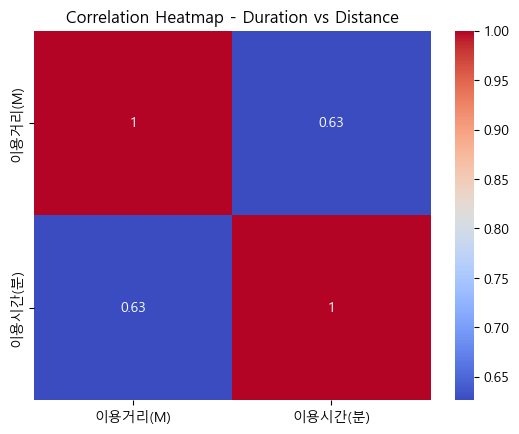

In [43]:
# 상관계수 계산
correlation_matrix = df.corr()

# 한글 폰트 설정 적용
plt.rcParams['font.family'] = 'malgun Gothic'

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Duration vs Distance')

# 그래프 표시
plt.show()

#### 회귀분석
* 종속변수는 이용시간(분)
* 독립변수는 생년,	성별,	이용자종류

In [45]:
import pandas as pd
import statsmodels.api as sm

# 범주형 변수 변환
categorical_cols = ['성별',	'이용자종류']
data_encoded = pd.get_dummies(df_bike[['성별', '이용자종류', '이용시간(분)']], columns=categorical_cols, drop_first=True).astype('int')

# 독립변수/종속변수 설정
y = data_encoded['이용시간(분)']
X = data_encoded.drop('이용시간(분)', axis=1)

# 상수항 추가
X = sm.add_constant(X)

# 회귀식 도출
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                이용시간(분)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3276.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:21:04   Log-Likelihood:            -1.3369e+07
No. Observations:             2804875   AIC:                         2.674e+07
Df Residuals:                 2804872   BIC:                         2.674e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0273      0.027    933.860      0.0

In [46]:
len(df_bike)

2804875